In [6]:
# Import necessary libraries
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
from nltk import *
from plotly import express as px
import matplotlib.pyplot as plt
import csv
import pandas as pd
# Read WhatsApp chat file
with open("C:\\Users\\saipr\\OneDrive\\Desktop\WhatsApp Chat with AVCMSC-2021-23.txt", 'r', encoding='utf-8') as file:
    data = file.readlines()

# Remove extra lines from the data
data = [line.strip() for line in data]

# Separate data into different columns
df = pd.DataFrame(data, columns=['message'])
df = df[df['message'].str.contains(': ')]
df[['sender_info', 'message']] = df['message'].str.split(': ', 1, expand=True)
df[['date', 'time']] = df['sender_info'].str.split(' - ', 1, expand=True)
df['sender'] = df['sender_info'].str.split(' - ', 1, expand=True)[1]
df.drop('sender_info', axis=1, inplace=True)

# Save data to a CSV file
df.to_csv('whatsapp_chat_processed.csv', index=False)

# Write data to another format (e.g., TXT file)
with open('whatsapp_chat_processed.txt', 'w', encoding='utf-8') as file:
    for _, row in df.iterrows():
        file.write(f"{row['date']} - {row['time']}\n")
        file.write(f"{row['sender']}: {row['message']}\n\n")


In [7]:
df # viewing the data set

,message,date,time,sender
4,https://classroom.google.com/c/NDU2NDA1MTY5OTI...,"28/01/2022, 11:33 am",+91 99085 59398,+91 99085 59398
5,For todays DM notes 👆,"28/01/2022, 11:34 am",+91 99085 59398,+91 99085 59398
6,Students those who are applying for scholarshi...,"28/01/2022, 12:46 pm",Vamshi Sir Av Clg,Vamshi Sir Av Clg
7,Ratna is inviting you to a scheduled Zoom meet...,"29/01/2022, 8:23 am",Ratna mam Av Clg,Ratna mam Av Clg
9,Operating System,Topic,None,None
...,...,...,...,...
1863,Today up to 3 pm every one to submit the title,"15/05/2023, 10:30 am",Vamshi Sir Av Clg,Vamshi Sir Av Clg
1865,<Media omitted>,"15/05/2023, 2:36 pm",Vamshi Sir Av Clg,Vamshi Sir Av Clg
1866,Check your titles once agay,"15/05/2023, 2:36 pm",Vamshi Sir Av Clg,Vamshi Sir Av Clg
1867,<Media omitted>,"16/05/2023, 11:43 am",Vamshi Sir Av Clg,Vamshi Sir Av Clg


In [8]:
df.head(30) # first 30 values of dataset

,message,date,time,sender
4,https://classroom.google.com/c/NDU2NDA1MTY5OTI...,"28/01/2022, 11:33 am",+91 99085 59398,+91 99085 59398
5,For todays DM notes 👆,"28/01/2022, 11:34 am",+91 99085 59398,+91 99085 59398
6,Students those who are applying for scholarshi...,"28/01/2022, 12:46 pm",Vamshi Sir Av Clg,Vamshi Sir Av Clg
7,Ratna is inviting you to a scheduled Zoom meet...,"29/01/2022, 8:23 am",Ratna mam Av Clg,Ratna mam Av Clg
9,Operating System,Topic,None,None
10,This is a recurring meeting Meet anytime,Time,None,None
15,860 5495 0766,Meeting ID,None,None
16,d3WX08,Passcode,None,None
17,sneha krovi is inviting you to a scheduled Zoo...,"29/01/2022, 9:33 am",+91 99496 93715,+91 99496 93715
19,sneha krovi's Personal Meeting Room,Topic,None,None


In [9]:
comment_words=' ' ## removing stop words from message 
stopwords=set(STOPWORDS)
for val in df.message:
    val=str(val)
    tokens=val.split()
    for i in range(len(tokens)): 
        tokens[i]=tokens[i].lower()
        for words in tokens:
            comment_words=comment_words + words +' '

In [10]:
# forming wordcloud image
wordcloud=WordCloud(width=1000,height=1000,background_color='white',stopwords=stopwords,min_font_size=10).generate(comment_words)

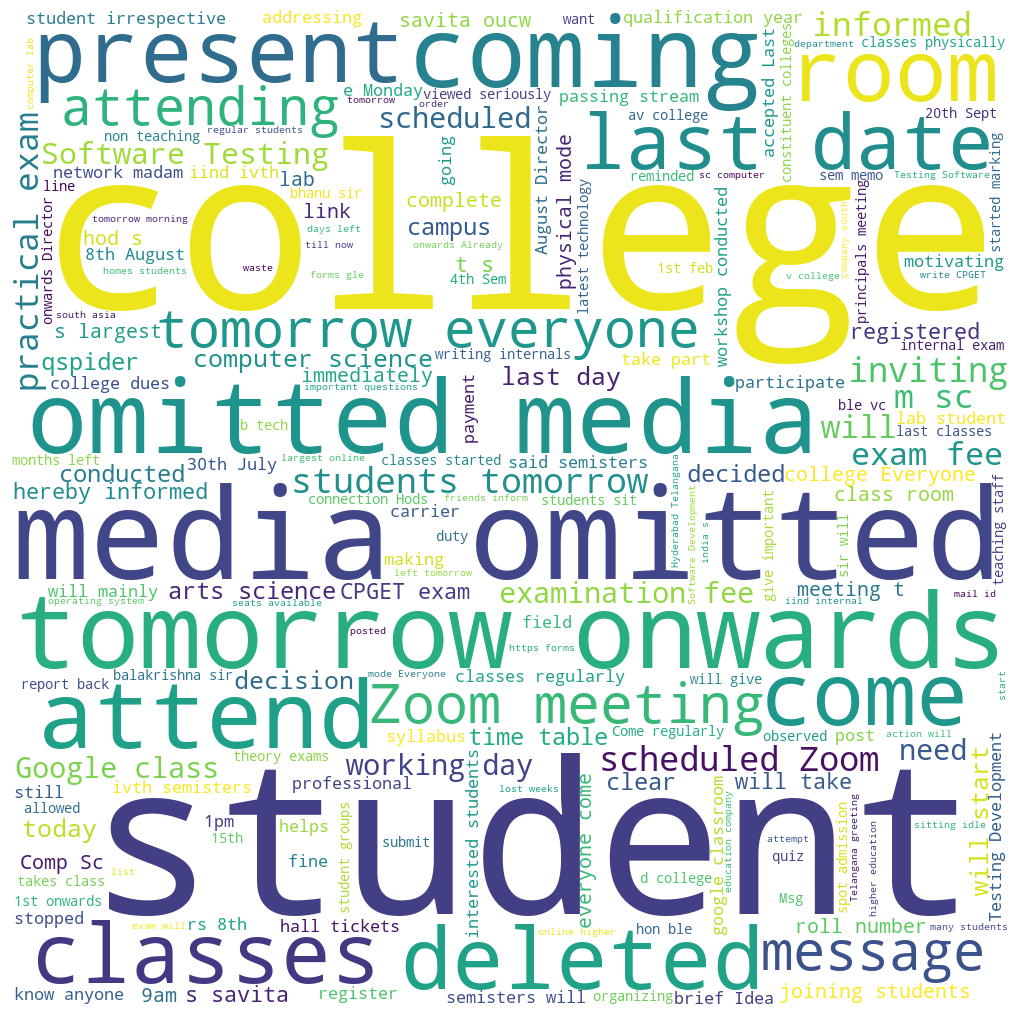

In [11]:
## Displaying the wordcloud image
plt.figure(figsize=(10,10),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [12]:
import nltk # importing library to perform sentiment analysis 

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer ##  importing  SentimentIntensityAnalyzer

In [14]:
sentiment=SentimentIntensityAnalyzer() # storing in variable  sentiment

In [15]:
df.describe()

,message,date,time,sender
count,755,755,645,645
unique,514,579,11,11
top,<Media omitted>,Meeting ID,Vamshi Sir Av Clg,Vamshi Sir Av Clg
freq,159,13,458,458


In [16]:
df.dropna().sum().count() ## checking for null values

4

In [17]:

df.dropna() ## removing null values

,message,date,time,sender
4,https://classroom.google.com/c/NDU2NDA1MTY5OTI...,"28/01/2022, 11:33 am",+91 99085 59398,+91 99085 59398
5,For todays DM notes 👆,"28/01/2022, 11:34 am",+91 99085 59398,+91 99085 59398
6,Students those who are applying for scholarshi...,"28/01/2022, 12:46 pm",Vamshi Sir Av Clg,Vamshi Sir Av Clg
7,Ratna is inviting you to a scheduled Zoom meet...,"29/01/2022, 8:23 am",Ratna mam Av Clg,Ratna mam Av Clg
17,sneha krovi is inviting you to a scheduled Zoo...,"29/01/2022, 9:33 am",+91 99496 93715,+91 99496 93715
...,...,...,...,...
1863,Today up to 3 pm every one to submit the title,"15/05/2023, 10:30 am",Vamshi Sir Av Clg,Vamshi Sir Av Clg
1865,<Media omitted>,"15/05/2023, 2:36 pm",Vamshi Sir Av Clg,Vamshi Sir Av Clg
1866,Check your titles once agay,"15/05/2023, 2:36 pm",Vamshi Sir Av Clg,Vamshi Sir Av Clg
1867,<Media omitted>,"16/05/2023, 11:43 am",Vamshi Sir Av Clg,Vamshi Sir Av Clg


In [18]:
data1=pd.DataFrame()
data1["positive"]=[sentiment.polarity_scores(i)["pos"]for i in df["message"]] ## using SentimentIntensityAnalyzer checking polarity scores for data
data1["negative"]=[sentiment.polarity_scores(i)["neg"]for i in df["message"]]
data1["neutral"]=[sentiment.polarity_scores(i)["neu"]for i in df["message"]]


In [19]:
data1 # creating dataframe for polarity scores

,positive,negative,neutral
0,0.000,0.0,1.000
1,0.000,0.0,1.000
2,0.000,0.0,1.000
3,0.247,0.0,0.753
4,0.000,0.0,1.000
...,...,...,...
750,0.000,0.0,1.000
751,0.000,0.0,1.000
752,0.000,0.0,1.000
753,0.000,0.0,1.000


In [20]:
postive=sum(data1['positive'])
Negative=sum(data1['negative'])
neutral=sum(data1['neutral']) ## sum of polarity scores

In [21]:
if postive<Negative or postive>neutral:
    print("postive")
elif postive<neutral or Negative<neutral:
    print("netural")
else:
    print("negative")

netural
